# L2: Working with the API

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
from anthropic import Anthropic

In [2]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
client = Anthropic()

In [4]:
MODEL_NAME="claude-3-5-sonnet-20241022"

In [5]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": "Write a haiku about Anthropic"}
    ]
)

print(response.content[0].text)

Here's a haiku about Anthropic:

Digital frontiers
Seeking truths through neural nets
Ethics light the way


<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [6]:
response

Message(id='msg_0187sD5S8btvGjm2vH5np7CN', content=[TextBlock(text="Here's a haiku about Anthropic:\n\nDigital frontiers\nSeeking truths through neural nets\nEthics light the way", type='text')], model='claude-3-5-sonnet-20241022', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=15, output_tokens=30))

## The Messages Format

In [7]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": "Hello! Only speak to me in Spanish"},
        {"role": "assistant", "content": "Hola!"},
        {"role": "user", "content": "How are you?"}
    ]
)

print(response.content[0].text)

¡Estoy muy bien, gracias! ¿Y tú? ¿Cómo estás?


### Simple Chatbot

In [8]:
print("Simple Chatbot (type 'quit' to exit)")
# Store conversation history
messages = []
while True:
    # Get user input
    user_input = input("You: ")
    # Check for quit command
    if user_input.lower() == 'quit':
        print("Goodbye!")
        break
    # Add user message to history
    messages.append({"role": "user", "content": user_input})
    try:
        # Get response from Claude
        response = client.messages.create(
            model=MODEL_NAME,
            max_tokens=200,
            messages=messages
        )
        # Extract and print Claude's response
        asst_message = response.content[0].text
        print("Assistant:", asst_message)
        
        # Add assistant response to history
        messages.append({"role": "assistant", "content": asst_message})
        
    except Exception as e:
        print(f"An error occurred: {e}")

Simple Chatbot (type 'quit' to exit)
You: hello, I'm Bob
Assistant: Hi Bob! I'm Claude. Nice to meet you. Is there anything in particular I can help you with today?
You: what's my name?
Assistant: Your name is Bob, as you just told me.
You: help me learn more about how LLMs work
Assistant: I'll explain Large Language Models (LLMs) at a high level:

1. Basic Concept
- LLMs are AI systems trained on massive amounts of text data
- They learn patterns in language and how words relate to each other
- They can generate human-like text responses based on the input they receive

2. Key Components
- Training Data: Huge datasets of text from books, websites, articles, etc.
- Architecture: Based on the "transformer" model, which uses attention mechanisms
- Parameters: Mathematical values that help the model process language (ranging from millions to hundreds of billions)

3. How They Work
- Pre-training: The model learns general language patterns
- Fine-tuning: Additional training for specific ta

### Prefilling the Assistant Response

In [9]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": "Write a short poem about pigs"},
        {"role": "assistant", "content": "Oink"}
    ]
)

print(response.content[0].text)

, oink, wallowing in mud,
Pink and round, a happy bud.
Curly tail and sniffly snout,
Rooting, digging all about.

Smart and social, full of joy,
Like a child with a favorite toy.
Rolling in the summer sun,
Making pig life so much fun!


## Model Parameters

### Max Tokens

In [10]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=100,
    messages=[
        {"role": "user", "content": "Write me an essay on LLMs"},
    ]
)
print(response.content[0].text)

Here's an essay on Large Language Models (LLMs):

Large Language Models: The Evolution of Artificial Intelligence

Large Language Models (LLMs) represent one of the most significant advances in artificial intelligence over the past decade. These sophisticated AI systems, trained on vast amounts of text data, have revolutionized natural language processing and opened new possibilities for human-machine interaction.

At their core, LLMs are neural networks designed to understand and generate human-like text. They


In [11]:
response

Message(id='msg_018Bd9SUEjQEaDgnfEd5Kr9g', content=[TextBlock(text="Here's an essay on Large Language Models (LLMs):\n\nLarge Language Models: The Evolution of Artificial Intelligence\n\nLarge Language Models (LLMs) represent one of the most significant advances in artificial intelligence over the past decade. These sophisticated AI systems, trained on vast amounts of text data, have revolutionized natural language processing and opened new possibilities for human-machine interaction.\n\nAt their core, LLMs are neural networks designed to understand and generate human-like text. They", type='text')], model='claude-3-5-sonnet-20241022', role='assistant', stop_reason='max_tokens', stop_sequence=None, type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=15, output_tokens=100))

### Stop Sequences

In [12]:
prompt = """
Generate a numbered, ordered list of technical topics 
I should learn if I want to work on LLMs
"""
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=500,
    messages=[{"role": "user", "content": prompt}],
)
print(response.content[0].text)


1. Python Programming
   - Data structures and algorithms
   - Object-oriented programming
   - Common libraries (NumPy, Pandas, SciPy)

2. Machine Learning Fundamentals
   - Supervised and unsupervised learning
   - Model evaluation metrics
   - Feature engineering
   - Cross-validation techniques

3. Deep Learning Basics
   - Neural network architectures
   - Activation functions
   - Backpropagation
   - Optimization algorithms (SGD, Adam, etc.)
   - Regularization techniques

4. Natural Language Processing (NLP)
   - Text preprocessing
   - Tokenization
   - Word embeddings (Word2Vec, GloVe)
   - Language modeling
   - Text classification
   - Sequence modeling

5. Transformer Architecture
   - Self-attention mechanism
   - Multi-head attention
   - Positional encoding
   - Layer normalization
   - Feed-forward networks

6. Modern LLM Architectures
   - BERT, GPT, T5
   - Encoder-decoder models
   - Parameter-efficient fine-tuning
   - Few-shot learning
   - Prompt engineering

7.

In the follwong cell <code>stop_sequences</code> to <code>["4."]</code>. This will stop the output as soon as "4." is generated.

In [13]:
prompt = """
Generate a numbered, ordered list of technical topics 
I should learn if I want to work on LLMs
"""
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=500,
    stop_sequences=["4."],
    messages=[{"role": "user", "content": prompt}],
)
print(response.content[0].text)


1. Python Programming
   - Data structures and algorithms
   - Object-oriented programming
   - Python libraries (NumPy, Pandas, SciPy)

2. Mathematics Fundamentals
   - Linear Algebra
   - Calculus
   - Probability and Statistics
   - Information Theory

3. Machine Learning Basics
   - Supervised Learning
   - Unsupervised Learning
   - Neural Networks
   - Optimization Techniques
   - Gradient Descent




In [14]:
response

Message(id='msg_011JqvGkoPmuDWnXHxCDGUsg', content=[TextBlock(text='\n1. Python Programming\n   - Data structures and algorithms\n   - Object-oriented programming\n   - Python libraries (NumPy, Pandas, SciPy)\n\n2. Mathematics Fundamentals\n   - Linear Algebra\n   - Calculus\n   - Probability and Statistics\n   - Information Theory\n\n3. Machine Learning Basics\n   - Supervised Learning\n   - Unsupervised Learning\n   - Neural Networks\n   - Optimization Techniques\n   - Gradient Descent\n\n', type='text')], model='claude-3-5-sonnet-20241022', role='assistant', stop_reason='stop_sequence', stop_sequence='4.', type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=32, output_tokens=113))

## Temperature

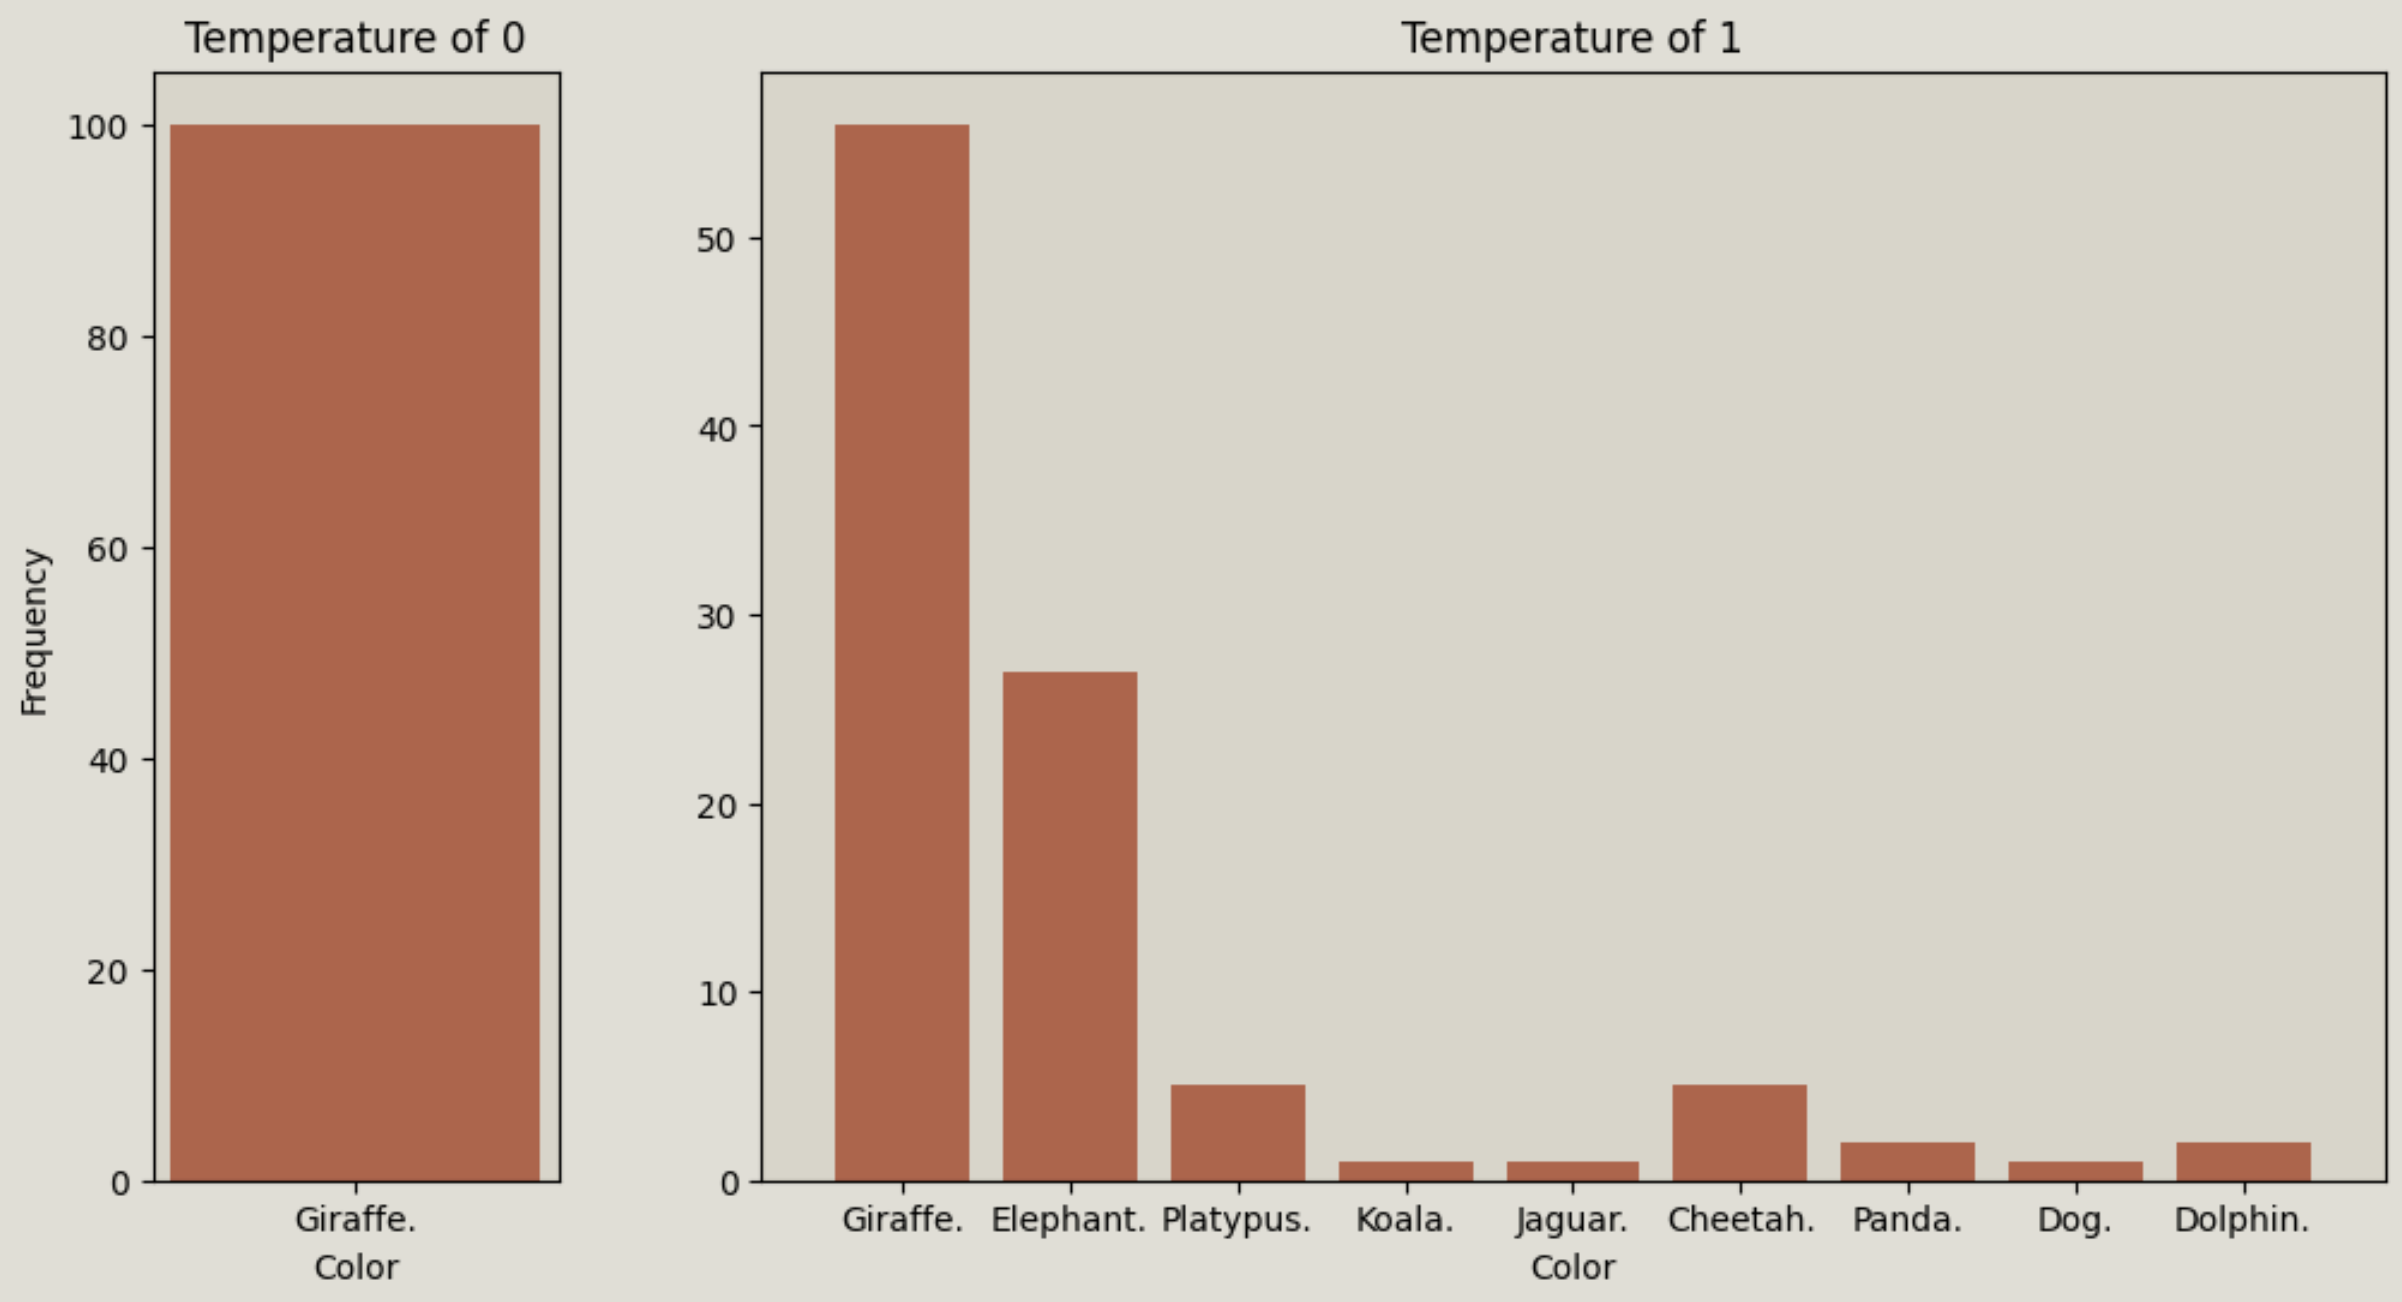

In [15]:
def demonstrate_temperature():
    temperatures = [0, 1]
    for temperature in temperatures:
        print(f"Prompting Claude three times with temperature of {temperature}")
        print("================")
        for i in range(3):
            response = client.messages.create(
                model=MODEL_NAME,
                max_tokens=100,
                messages=[{"role": "user", "content": f"Prompt {i+1}: Come up with a name for an alien planet. Respond with a single word."}],
                temperature=temperature
            )
            print(f"Response {i+1}: {response.content[0].text}")

In [16]:
demonstrate_temperature()

Prompting Claude three times with temperature of 0
Response 1: Kestrax
Response 2: Zephyrix
Response 3: Kestrax
Prompting Claude three times with temperature of 1
Response 1: Zephyria
Response 2: Zephyria
Response 3: Zephyrix


<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Computer Use Code:</b> The computer use code shown at the end of the video is not part of this lab. This code will also be reviewed step by step in the next lessons, and finally, you will see it in detail in the "Computer Use" lesson.</p>